In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = load_diabetes()
X = data['data']
y = data['target']
np.random.seed(32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

Linear Regression

$\theta = (X^{T}X)^{-1}X^{T}y$

In [3]:
# Derivative = 0 formula
model1 = np.linalg.inv(X_train.T @ X_train) @ (X_train.T) @ y_train
y_hat_1 = X_test @ model1

In [4]:
# Sklearn Implementation
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_hat_2 = model2.predict(X_test)

In [5]:
# Singular Value Decomposition
U, S, VT= np.linalg.svd(X_train, full_matrices=False)
model3 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ y_train
y_hat_3 = X_test @ model3

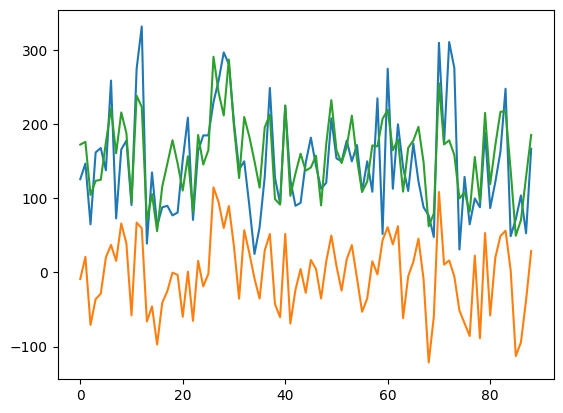

In [6]:
sno = np.arange(len(y_test))
plt.plot(sno, y_test)
plt.plot(sno, y_hat_1)
plt.plot(sno, y_hat_2)
# plt.plot(sno, y_hat_3) # gives same result as model1

In [7]:
# Loss 
mean_squared_error(y_test,y_hat_1)

25031.751595709775

In [8]:
# Sklearn implementation loss
mean_squared_error(y_test,y_hat_2)

2787.6434024439145

Polynomial Regression \
We can improve the peroformance of Linear Regression by adding polynomials of features.

In [9]:
trans = PolynomialFeatures(degree = 2)
X_train_with_pf = trans.fit_transform(X_train)
X_test_with_pf = trans.fit_transform(X_test)

In [10]:
model1 = np.linalg.inv(X_train_with_pf.T @ X_train_with_pf) @ (X_train_with_pf.T) @ y_train
y_hat_1 = X_test_with_pf @ model1

In [11]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_hat_2 = model2.predict(X_test)

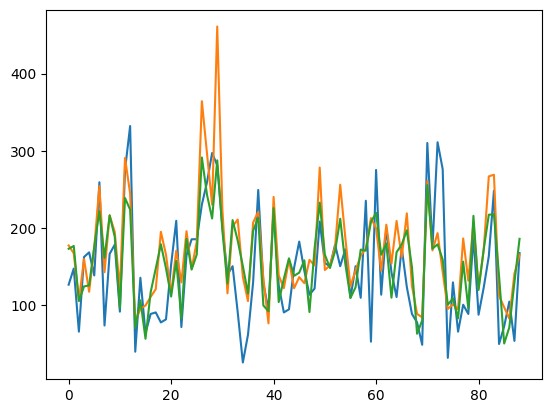

In [12]:
sno = np.arange(len(y_hat_1))
plt.plot(sno,y_test)
plt.plot(sno, y_hat_1)
plt.plot(sno, y_hat_2)

In [13]:
# Loss 
mean_squared_error(y_test,y_hat_1)

3626.4586471045172

We can see by adding polynomial features, the mean squared error reduced by a factor of 8! and gave a much better model

More Basis Functions \
Similar to ading polynomials as features, we can add features which are function of given features

Chebyshev Polynomials

$T_{0}(x) = 1$\
$T_{1}(x) = x$\
$T_{n+1}(x) = 2xT_{n}(x) - T_{n-1}(x)$

In [14]:
# Chebyshev Polynomials
def chebyshev_polynomial(x,degree):
    n = degree
    if degree == 0 :
        return 1
    elif degree == 1:
        return x
    else :
        return (2*x)*chebyshev_polynomial(x,n-1) - chebyshev_polynomial(x,n-2)

Legendre Polynomial

$P_{0}(x) = 1$\
$P_{1}(x) = x$\
$(n+1)P_{n+1}(x) = (2n+1)P_{n}(x) - P_{n-1}(x)$ 

In [15]:
# Legendre Polynomial
def legendre_polynomial(x, degree):
    n = degree
    if degree == 0 :
        return 1
    elif degree == 1:
        return x
    else :
        return ((1/n)*((2*n-1)*legendre_polynomial(x,n-1) - legendre_polynomial(x,n-2)))

Bernstein Basis

$B_{n,i}(x) = {n\choose i} (1-x)^{n-i}x^{i} $